# 02.Analisis Exploratorio

## Importacion de los datos

### Historico del Bitcoin

In [3]:
import pandas as pd
import numpy as np
df_btc=pd.read_csv("C:/Repos/Projecto_TRM/Datos/btc_USD_historic.csv")
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1096 non-null   object
 1   Close   1097 non-null   object
 2   High    1097 non-null   object
 3   Low     1097 non-null   object
 4   Open    1097 non-null   object
 5   Volume  1097 non-null   object
dtypes: object(6)
memory usage: 51.6+ KB


###  Convertir a variables numericas

In [9]:
columnas_numericas = df_btc.columns.values[1:]
print(columnas_numericas)
df_btc[columnas_numericas] = df_btc[columnas_numericas].apply(pd.to_numeric, errors='coerce')
df_btc['Date'] = pd.to_datetime(df_btc['Date'], format='%Y-%m-%d')
df_btc.info()

['Close' 'High' 'Low' 'Open' 'Volume']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1096 non-null   datetime64[ns]
 1   Close   1096 non-null   float64       
 2   High    1096 non-null   float64       
 3   Low     1096 non-null   float64       
 4   Open    1096 non-null   float64       
 5   Volume  1096 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 51.6 KB


### Hallar las medidas mas importantes en los ultimos 7 dias

In [39]:
print(df_btc.describe())
df_btc['Close_7d'] = df_btc['Close'].rolling(window=7).mean()
df_btc['Volume_7d'] = df_btc['Volume'].rolling(window=7).mean()
std = df_btc['Close'].std()
mean = df_btc['Close'].mean()
outliers = df_btc[np.abs(df_btc['Close'] - mean) > 3 * std]
print(f"outliers: {outliers}")
print(f"mean: {mean}")
print(f"std: {std}")

                      Date          Close           High            Low  \
count                 1096    1096.000000    1096.000000    1096.000000   
mean   2023-10-05 12:00:00   45478.525795   46316.120509   44553.152415   
min    2022-04-06 00:00:00   15787.284180   16253.047852   15599.046875   
25%    2023-01-04 18:00:00   24719.875000   25228.042969   24302.009766   
50%    2023-10-05 12:00:00   35440.408203   35906.130859   34691.027344   
75%    2024-07-05 06:00:00   64309.862305   65740.130859   62891.556641   
max    2025-04-05 00:00:00  106146.265625  109114.882812  105291.734375   
std                    NaN   25446.317466   25958.081392   24850.639757   

                Open        Volume       Close_7d     Volume_7d  
count    1096.000000  1.096000e+03    1090.000000  1.090000e+03  
mean    45443.824842  3.000505e+10   45381.396122  3.000236e+10  
min     15782.300781  5.331173e+09   16352.882952  9.973516e+09  
25%     24738.201172  1.715140e+10   24397.513532  1.976995e

### Principales noticias Coin Desk

In [1]:
import pandas as pd
import numpy as np
df_news=pd.read_csv("C:/Repos/Projecto_TRM/Datos/noticias_bitcoin_top3_diarias.csv")

df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fecha        141 non-null    object
 1   titulo       141 non-null    object
 2   descripcion  141 non-null    object
 3   contenido    141 non-null    object
 4   url          141 non-null    object
 5   fuente       141 non-null    object
dtypes: object(6)
memory usage: 6.7+ KB


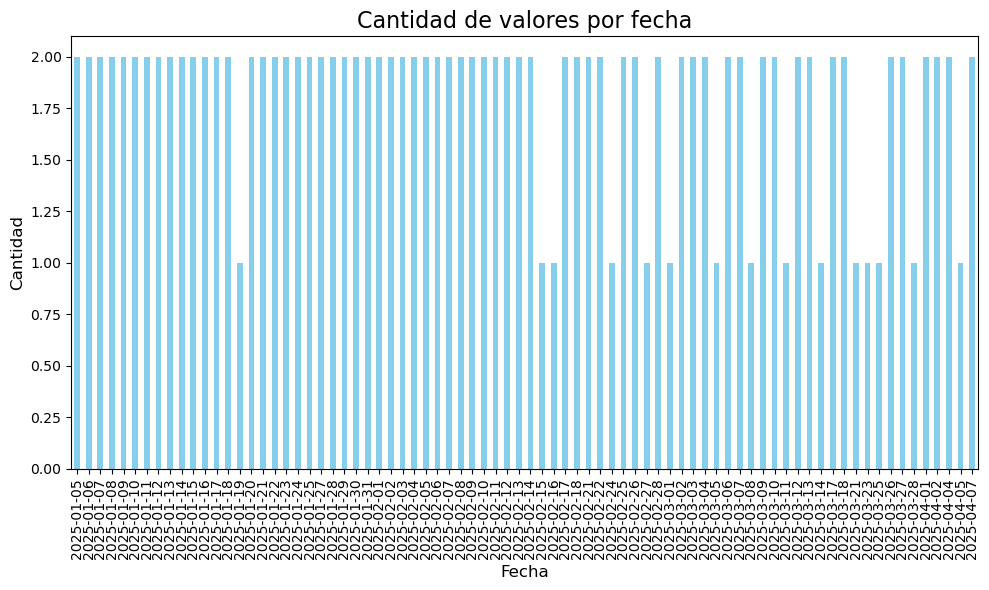

In [4]:
import matplotlib.pyplot as plt

# Contar valores por fecha
conteo_fechas = df_news['fecha'].value_counts().sort_index()

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
conteo_fechas.plot(kind='bar', color='skyblue')
plt.title('Cantidad de valores por fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 04. Visualizacion de Datos

In [40]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_btc['Date'], y=df_btc['Close'], mode='lines', name='BTC USD diario'))
fig.add_trace(go.Scatter(x=df_btc['Date'], y=df_btc['Close_7d'], mode='lines', name='Media Móvil', line=dict(dash='dash')))

# Agregar título y etiquetas opcionales
fig.update_layout(
    title='Precio de Bitcoin y Media Móvil de 7 Días',
    xaxis_title='Fecha',
    title_x=0.5,
    yaxis_title='Precio USD',
    yaxis=dict(tickformat=',.2f')  # separador de miles y 2 decimales
)
fig.show()
# Crear una nueva figura para el volumen
fig_volume = go.Figure()
fig_volume.add_trace(go.Scatter(x=df_btc['Date'], y=df_btc['Volume'], mode='lines', name='Volumen'))
fig_volume.add_trace(go.Scatter(x=df_btc['Date'], y=df_btc['Volume_7d'], mode='lines', name='Media Móvil', line=dict(dash='dash')))

# Agregar título y etiquetas opcionales
fig_volume.update_layout(
    title='Volumen de Bitcoin',
    xaxis_title='Fecha',
    title_x=0.5,
    yaxis_title='Volumen',
    yaxis=dict(tickformat=',.2f')  # separador de miles y 2 decimales
)

fig_volume.show()



### Exportar data frame con la media movil

In [ ]:
df_btc.to_csv('C:/Repos/Projecto_TRM/Datos/BTC_USD_Media_Movil.csv', index=False)